In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
pd.set_option('display.max_columns', None)

In [173]:
df = pd.read_csv('../data/flats_missing_value_imputation.csv')

In [174]:
df.shape

(2832, 13)

In [175]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'bedRoom', 'bathroom',
       'balcony', 'extra_rooms', 'floorNum', 'agePossession', 'built_up_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [176]:
df.isnull().sum()

society            0
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
extra_rooms        0
floorNum           0
agePossession      0
built_up_area      0
furnishing_type    0
luxury_score       0
dtype: int64

In [177]:
df.duplicated().sum()

np.int64(4)

In [178]:
df.head()

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,extra_rooms,floorNum,agePossession,built_up_area,furnishing_type,luxury_score
0,maa bhagwati residency,0.45,sector 7,4500.000000,2,2,1,0,4,Relatively New,1000.0,0,28
1,apna enclave,0.50,sector 3,6925.207756,2,2,1,0,1,Old Property,722.0,2,37
2,tulsiani easy in homes,0.40,sohna road,6051.437216,2,2,3,0,12,New Property,661.0,0,36
3,smart world orchard,1.47,sector 61,11027.756939,2,2,2,1,2,Under Construction,1333.0,0,76
4,parkwood westend,0.70,sector 92,5751.848809,2,2,3,1,5,Under Construction,1217.0,0,0


Comments: We want to drop 'society' and 'price_per_sqft' column coz in website we are not going to ask these things. If someone already knows 'price_per_sqft' he can already predict the price.

In [179]:

train_df = df.drop(columns=['society','price_per_sqft'])

In [180]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,extra_rooms,floorNum,agePossession,built_up_area,furnishing_type,luxury_score
0,0.45,sector 7,2,2,1,0,4,Relatively New,1000.0,0,28
1,0.50,sector 3,2,2,1,0,1,Old Property,722.0,2,37
2,0.40,sohna road,2,2,3,0,12,New Property,661.0,0,36
3,1.47,sector 61,2,2,2,1,2,Under Construction,1333.0,0,76
4,0.70,sector 92,2,2,3,1,5,Under Construction,1217.0,0,0


Luxury Score

Comments: We want to convert this column to a category column. Bcoz in website we can't ask user to give a luxury score. Instead we'll ask user to provide luxury type 'low', 'medium', 'high'

<Axes: ylabel='luxury_score'>

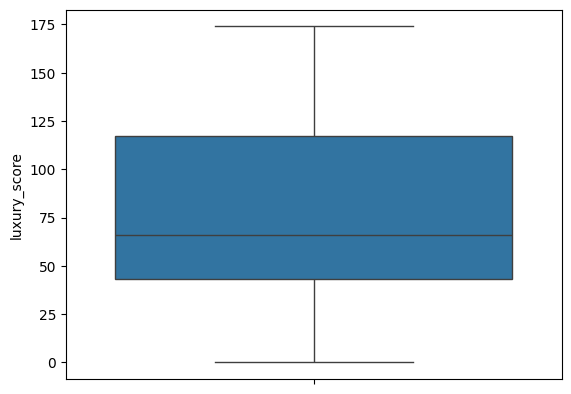

In [181]:
sns.boxplot(df['luxury_score'])

In [182]:
df['luxury_score'].value_counts().sort_index()

luxury_score
0      227
5        6
6        5
7       16
8       17
      ... 
166     10
167     21
168      9
169      1
174    195
Name: count, Length: 156, dtype: int64

In [183]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif score >= 150:
        return "High"

In [184]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [185]:
train_df['luxury_category'].value_counts().sort_index()

luxury_category
High       449
Low       1138
Medium    1245
Name: count, dtype: int64

In [186]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,extra_rooms,floorNum,agePossession,built_up_area,furnishing_type,luxury_score,luxury_category
0,0.45,sector 7,2,2,1,0,4,Relatively New,1000.0,0,28,Low
1,0.50,sector 3,2,2,1,0,1,Old Property,722.0,2,37,Low
2,0.40,sohna road,2,2,3,0,12,New Property,661.0,0,36,Low
3,1.47,sector 61,2,2,2,1,2,Under Construction,1333.0,0,76,Medium
4,0.70,sector 92,2,2,3,1,5,Under Construction,1217.0,0,0,Low


floorNum

Comments: We want to convert this column to a category column. Bcoz in website we can't ask user to mention specific floor. Instead we'll ask user to provide 'Low Floor', 'Mid Floor', 'High Floor'

In [187]:
train_df['floorNum'].value_counts().sort_index()

floorNum
0     124
1     203
2     242
3     229
4     191
5     163
6     181
7     178
8     195
9     160
10    176
11    110
12    155
13     39
14    108
15     79
16     51
17     47
18     37
19     33
20     25
21     15
22     13
23     14
24     11
25      9
26      5
27      7
28      4
29      3
30      5
31      3
32      2
33      3
34      2
35      2
38      1
39      2
40      1
43      2
44      1
45      1
Name: count, dtype: int64

In [188]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif floor >= 11:
        return "High Floor"

In [189]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [190]:
train_df['floor_category'].value_counts().sort_index()

floor_category
High Floor     790
Low Floor      569
Mid Floor     1473
Name: count, dtype: int64

In [191]:
train_df.columns

Index(['price', 'sector', 'bedRoom', 'bathroom', 'balcony', 'extra_rooms',
       'floorNum', 'agePossession', 'built_up_area', 'furnishing_type',
       'luxury_score', 'luxury_category', 'floor_category'],
      dtype='object')

Comments: Dropping 'floorNum' and 'luxury_score' column now

In [192]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [193]:
train_df.columns

Index(['price', 'sector', 'bedRoom', 'bathroom', 'balcony', 'extra_rooms',
       'agePossession', 'built_up_area', 'furnishing_type', 'luxury_category',
       'floor_category'],
      dtype='object')

In [194]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,extra_rooms,agePossession,built_up_area,furnishing_type,luxury_category,floor_category
0,0.45,sector 7,2,2,1,0,Relatively New,1000.0,0,Low,Mid Floor
1,0.50,sector 3,2,2,1,0,Old Property,722.0,2,Low,Low Floor
2,0.40,sohna road,2,2,3,0,New Property,661.0,0,Low,High Floor
3,1.47,sector 61,2,2,2,1,Under Construction,1333.0,0,Medium,Low Floor
4,0.70,sector 92,2,2,3,1,Under Construction,1217.0,0,Low,Mid Floor


Feature Selection Techniques

In [195]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2832 non-null   float64
 1   sector           2832 non-null   object 
 2   bedRoom          2832 non-null   int64  
 3   bathroom         2832 non-null   int64  
 4   balcony          2832 non-null   object 
 5   extra_rooms      2832 non-null   int64  
 6   agePossession    2832 non-null   object 
 7   built_up_area    2832 non-null   float64
 8   furnishing_type  2832 non-null   int64  
 9   luxury_category  2832 non-null   object 
 10  floor_category   2832 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 243.5+ KB


In [196]:
train_df = train_df[["price", "sector", "built_up_area", "bedRoom", "bathroom", "balcony", "extra_rooms", "agePossession", "furnishing_type", "luxury_category", "floor_category"]]
print(train_df)

      price      sector  built_up_area  bedRoom  bathroom balcony  \
0      0.45    sector 7         1000.0        2         2       1   
1      0.50    sector 3          722.0        2         2       1   
2      0.40  sohna road          661.0        2         2       3   
3      1.47   sector 61         1333.0        2         2       2   
4      0.70   sector 92         1217.0        2         2       3   
...     ...         ...            ...      ...       ...     ...   
2827   1.05   sector 86         1715.0        3         3       3   
2828   3.30   sector 48         3305.0        5         5      3+   
2829   0.95  sector 108         1649.0        3         3       3   
2830   5.80   sector 24         3700.0        3         4      3+   
2831  11.00   sector 54         2826.0        4         6       3   

      extra_rooms       agePossession  furnishing_type luxury_category  \
0               0      Relatively New                0             Low   
1               0      

In [197]:
train_df.isnull().sum()

price              0
sector             0
built_up_area      0
bedRoom            0
bathroom           0
balcony            0
extra_rooms        0
agePossession      0
furnishing_type    0
luxury_category    0
floor_category     0
dtype: int64

In [198]:
train_df.to_csv('../data/flats_post_feature_selection.csv', index=False)

Remarks: We want to onehot encode the categorical(object) variables so fit into ml models. But do note, for tree based models it works fine. But for Linear Regression type models we have to use one hot encoding

In [199]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['ambience island', 'ats marigold', 'bhawani enclave',
       'block a sector 21', 'bptp', 'carterpuri village', 'civil l',
       'cyber city', 'dwarka expressway', 'garauli kalan',
       'godrej aria , sector 79 ,', 'golf course ext road', 'gwal pahari',
       'heritage city', 'iffco chowk', 'kanahi', 'lajpat nagar',
       'manesar', 'near pataudi chowk', 'near sector 1 market',
       'new sector 2 phase 2', 'old delhi road, opp sector-14',
       'rajiv colony', 'sai kunj', 'samaspur', 'saroop garden sector 105',
       'sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 14', 'sector 15',
       'sector 15 part 1', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 

Comment: X_lable is X now
        Y_lable is Y now

In [200]:
X_label

,sector,built_up_area,bedRoom,bathroom,balcony,extra_rooms,agePossession,furnishing_type,luxury_category,floor_category
0,96.0,1000.0,2,2,1.0,0,3.0,0,1.0,2.0
1,52.0,722.0,2,2,1.0,0,2.0,2,1.0,1.0
2,134.0,661.0,2,2,3.0,0,1.0,0,1.0,0.0
3,86.0,1333.0,2,2,2.0,1,4.0,0,2.0,1.0
4,121.0,1217.0,2,2,3.0,1,4.0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2827,114.0,1715.0,3,3,3.0,1,4.0,0,1.0,2.0
2828,70.0,3305.0,5,5,4.0,1,2.0,0,2.0,2.0
2829,33.0,1649.0,3,3,3.0,1,3.0,0,2.0,2.0
2830,49.0,3700.0,3,4,4.0,4,2.0,1,2.0,2.0


In [201]:
y_label

0        0.45
1        0.50
2        0.40
3        1.47
4        0.70
        ...  
2827     1.05
2828     3.30
2829     0.95
2830     5.80
2831    11.00
Name: price, Length: 2832, dtype: float64

Technique 1 - Correlation Analysis

<Axes: >

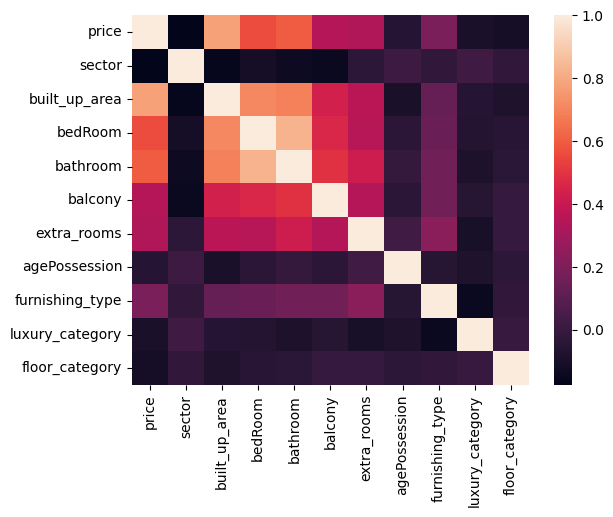

In [202]:
sns.heatmap(data_label_encoded.corr())

In [203]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.175522
1,built_up_area,0.779559
2,bedRoom,0.559427
3,bathroom,0.597106
4,balcony,0.352268
5,extra_rooms,0.332466
6,agePossession,-0.057609
7,furnishing_type,0.189357
8,luxury_category,-0.095842
9,floor_category,-0.108764


Technique 2 - Random Forest Feature Importance

In [204]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
1,built_up_area,0.693263
0,sector,0.185018
3,bathroom,0.022809
4,balcony,0.020650
6,agePossession,0.016296
2,bedRoom,0.014426
9,floor_category,0.013043
5,extra_rooms,0.012685
8,luxury_category,0.011272
7,furnishing_type,0.010538


Technique 3 - Gradient Boosting Feature importances

In [205]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
1,built_up_area,0.722316
0,sector,0.202897
3,bathroom,0.041987
7,furnishing_type,0.008426
2,bedRoom,0.007775
4,balcony,0.004070
6,agePossession,0.003784
9,floor_category,0.003546
5,extra_rooms,0.002699
8,luxury_category,0.002501


Technique 4 - Permutation Importance

In [206]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
1,built_up_area,0.874848
0,sector,0.304765
3,bathroom,0.022597
7,furnishing_type,0.008874
2,bedRoom,0.008403
6,agePossession,0.006377
8,luxury_category,0.004987
4,balcony,0.002444
9,floor_category,-0.000068
5,extra_rooms,-0.002566


Technique 5 - LASSO

In [207]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
1,built_up_area,0.950211
3,bathroom,0.173176
7,furnishing_type,0.087359
5,extra_rooms,0.029493
6,agePossession,0.000000
4,balcony,-0.012116
8,luxury_category,-0.039427
9,floor_category,-0.057369
0,sector,-0.059451
2,bedRoom,-0.073008


Technique 6 - RFE

In [208]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
1,built_up_area,0.691555
0,sector,0.190238
3,bathroom,0.022142
4,balcony,0.020017
6,agePossession,0.016562
9,floor_category,0.013442
5,extra_rooms,0.012846
2,bedRoom,0.012036
8,luxury_category,0.010831
7,furnishing_type,0.010333


Technique 7 - Linear Regression Weights

In [209]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
1,built_up_area,0.974867
3,bathroom,0.223839
7,furnishing_type,0.095786
5,extra_rooms,0.036651
6,agePossession,0.006965
4,balcony,-0.033214
8,luxury_category,-0.046025
9,floor_category,-0.066330
0,sector,-0.068125
2,bedRoom,-0.137909


Technique 8 - SHAP

In [210]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 0.02364935, -0.91550109, -0.03050859, ..., -0.00670847,
        -0.00748019, -0.02342779],
       [ 0.1351315 , -1.27338519, -0.03072731, ...,  0.02564215,
        -0.01526476, -0.01865744],
       [-0.28450009, -0.99383491, -0.02660119, ..., -0.00496688,
        -0.00436216,  0.02285203],
       ...,
       [-0.25063418, -0.24417816,  0.0054627 , ..., -0.01996144,
        -0.00600137, -0.06148779],
       [ 0.36006302,  3.16002252, -0.06466444, ...,  0.00477905,
         0.03198793,  0.0684269 ],
       [ 2.22155133,  3.79403325,  0.05763066, ...,  0.08479715,
        -0.04122449,  0.03412599]])

In [211]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
1,built_up_area,0.659880
0,sector,0.325220
3,bathroom,0.048282
9,floor_category,0.032351
4,balcony,0.028674
2,bedRoom,0.026378
6,agePossession,0.021213
8,luxury_category,0.021026
7,furnishing_type,0.015973
5,extra_rooms,0.011964


In [212]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [213]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.175522,0.185018,0.202897,0.304765,-0.059451,0.190238,-0.068125,0.325220
built_up_area,0.779559,0.693263,0.722316,0.874848,0.950211,0.691555,0.974867,0.659880
bedRoom,0.559427,0.014426,0.007775,0.008403,-0.073008,0.012036,-0.137909,0.026378
bathroom,0.597106,0.022809,0.041987,0.022597,0.173176,0.022142,0.223839,0.048282
balcony,0.352268,0.020650,0.004070,0.002444,-0.012116,0.020017,-0.033214,0.028674
extra_rooms,0.332466,0.012685,0.002699,-0.002566,0.029493,0.012846,0.036651,0.011964
agePossession,-0.057609,0.016296,0.003784,0.006377,0.000000,0.016562,0.006965,0.021213
furnishing_type,0.189357,0.010538,0.008426,0.008874,0.087359,0.010333,0.095786,0.015973
luxury_category,-0.095842,0.011272,0.002501,0.004987,-0.039427,0.010831,-0.046025,0.021026


In [214]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.728372
sector             0.241628
bathroom           0.031564
balcony            0.015171
bedRoom            0.013803
agePossession      0.012846
floor_category     0.012463
furnishing_type    0.010829
luxury_category    0.010123
extra_rooms        0.007526
dtype: float64

Comments: It's visible that 'extra_rooms' are not adding much importance here. We can remove the column. But we need to check 'r2' score adding and removing those column. If r2 score gets decreased after removing it then we can remove it safely

In [215]:
# with all the cols
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [216]:
scores.mean()

np.float64(0.7460776474861083)

In [217]:
# removing 'extra_rooms' column
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['extra_rooms']), y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.7464784883766109)

Comments: It's visible that not significant improvement in 'r2'score. So, no need to remove 'extra_rooms' column

In [218]:
# export_df = X_label.drop(columns=['extra_rooms'])
# export_df['price'] = y_label

In [219]:
# export_df

In [ ]:
# export_df.to_csv('../data/flats_post_feature_selection.csv', index=False)